In [ ]:
import numpy as np
import pandas as pd
import sklearn
import jieba

"""
先把空值、无效值删除
统计关键词出现次数，合计
最前和最后分别作为正例和反例
分词，向量化 训练随机森林分类
得到每条内容的类别
"""

file = pd.read_excel("C:/Users/Administrator.SC-201905252025/Desktop/test/groupchat.xlsx", sheet_name='Sheet1', names=['authaccount','from_id', 'to_id', 'content'])
df = pd.DataFrame(file)

keyword = [line.strip() for line in open("C:/Users/Administrator.SC-201905252025/Desktop/test/qg_keywords.txt", 'r', encoding="UTF-8").readlines()]

jieba.load_userdict("C:/Users/Administrator.SC-201905252025/Desktop/test/qg_keywords.txt")
def keyword_count(content):
    words=list(jieba.cut(content,cut_all=True))
    count_dict,key_list={},[]
    for i in keyword:
        a=words.count(i)
        if a>0:
            count_dict[i]=a
            key_list.append(i+'('+str(a)+')')
    return sum(count_dict.values())

df['key_count'] = df['content'].apply(keyword_count)
df=df.sort_values(by=['key_count'])

df_positive = df.loc[0:1000]
df_positive['label'] = 1
# df_negative = df.loc[-1000:]
# df_negative['label'] = 0


# cut_word_positive = jieba.cut(df_positive['content'])
# cut_word_negative = jieba.cut(df_negative['content'])


# model = sklearn.random_foreast()

# df['label'] = model.predict(df['content'].to_list())
# df = df.loc[df.label==1,]

# writer = pd.ExcelWriter("C:/Users/Administrator.SC-201905252025/Desktop/test/positive.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
# writer.book.strings_to_urls = False
# df_positive.to_excel(writer, 'Sheet1')
# writer.save()
# print(1)

In [36]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import jieba
import re
from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

def read_file():
    file = pd.read_excel("C:/Users/Administrator.SC-201905252025/Desktop/test/1.xlsx", sheet_name='Sheet1', names=['authaccount','from_id', 'to_id', 'content'])
    return pd.DataFrame(file)
    
    
def cutword(sent):
    line=re.sub(r'[a-zA-Z0-9]*','',sent)
    wordList=jieba.lcut(line,cut_all=False)
    return ' '.join([word for word in wordList if len(word)>1])

def vectorize(df):
    df['cutword'] = df['content'].apply(cutword)
    wordList = df['cutword'].tolist()
#     count_vect = CountVectorizer(min_df=1,analyzer='word')
    count_vect = TfidfVectorizer(binary=False,decode_error='ignore')
    word_vec = count_vect.fit_transform(wordList)
    tmp = word_vec.todense().tolist()
    df['vec'] = tmp
    df.drop(['cutword'],axis=1,inplace=True)
    return df

def writeFile(df):
    writer = pd.ExcelWriter("C:/Users/Administrator.SC-201905252025/Desktop/test/tmp.xlsx", engine='xlsxwriter',options={'strings_to_urls':False})
    writer.book.strings_to_urls = False
    df.to_excel(writer, 'Sheet1')
    writer.save()
    print(1)
    
def classCluster(df, num):
    km = KMeans(n_clusters=num, max_iter=300, n_init=40,init='k-means++',n_jobs=-1)
    result = km.fit_predict(np.mat(df['vec'].tolist()))
    result = result.tolist()
    df['label'] = result
    df.drop(['vec'], axis=1, inplace=True)
    return df

#     SSE = []
#     for k in range(1,20):
#         estimator = KMeans(n_clusters=k)
#         estimator.fit(df['vec'].tolist())
#         SSE.append(estimator.inertia_)
#     print(SSE)
#     return 0
    
if __name__ == "__main__":
    df = read_file()
    df = vectorize(df)
    df = classCluster(df, 17)
    writeFile(df)

1


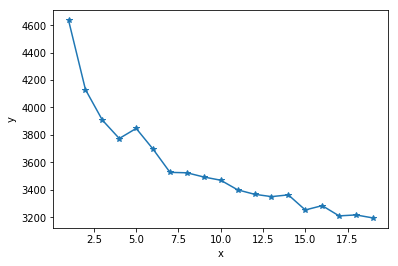

In [34]:
import matplotlib.pyplot as plt
# import numpy as np

Y = [4636.067675763558, 4130.637483895914, 3907.999139146372, 3773.7107185238456, 3847.2111149813563, 3695.9323579668517, 3526.786922513904, 3523.631616506411, 3493.0713577915126, 3469.4318018952986, 3399.3312856747625, 3367.0079590680743, 3349.8828871793457, 3362.5275079958637, 3252.648619236003, 3284.0522664325736, 3209.5297466827915, 3216.3241808316166, 3194.600974132139]
x = range(1,20)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, Y, '*-')
plt.show()